In [6]:
import pandas as pd    #pandas is dataframe library
import matplotlib.pyplot as plt  #plots data
import numpy as np     #numpy provides N dim object support

%matplotlib inline

In [7]:
df = pd.read_csv("dataset.csv")

In [8]:
df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [9]:
df.tail()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [5]:
df.isnull().values.any()

False

In [10]:
def plot_corr(df,size =11):
    """
    Function plots a graphical corrrelation matrix for each pair of column in the dataframe.
    
    Input:
        df:pandas DataFrame
        size:verticle and horizontal size of the plot
        
    Displays:
        matrix of correlation between column. Blue-cyan-yellow-red-darkred =>less to more correlated
                                              0 ---------------------> 1
                                              Expect a darkred line running from top left to bottom right
    """
    corr = df.corr() #data from corelation function
    fig,ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)  #color code for the rectangle by corelation values
    plt.xticks(range(len(corr.columns)),corr.columns) #draw x ticks marks
    plt.yticks(range(len(corr.columns)),corr.columns) #draw y ticks marks

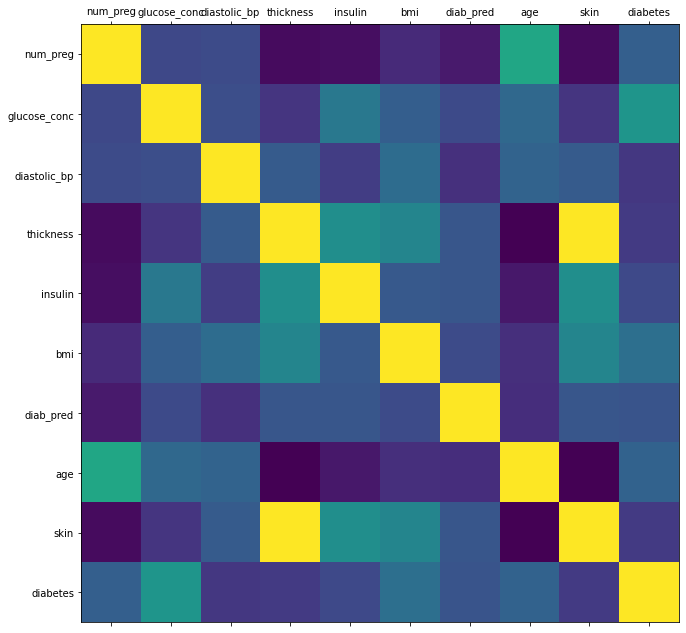

In [11]:
plot_corr(df)

In [12]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [13]:
num_true= len(df.loc[df['diabetes']==True])
num_false= len(df.loc[df['diabetes']==False])
print(num_true)
print(num_false)
total = (num_true + num_false)*1.00
print (total)
per_true = 100*(num_true / total)
per_false = 100*(num_false / total)
print (per_true)
print (per_false)

268
500
768.0
34.89583333333333
65.10416666666666


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred',
                    'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = split_test_size , random_state = 42)

In [16]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [17]:
from sklearn.impute import SimpleImputer
# impute with mean all 0 reading
fill_0 = SimpleImputer(missing_values=0, strategy = "mean" )

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)  #Create random forest object
rf_model.fit(X_train , y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [20]:
from sklearn.naive_bayes import GaussianNB

#create Gaussian Naive Bayes model object and train it with the data 
nb_model = GaussianNB()

nb_model.fit(X_train,y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
#predict values using the training data

nb_predict_train = nb_model.predict(X_train)

#import the performance matrix library
from sklearn import metrics

#Accuracy 
print ("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))

Accuracy : 0.7542


In [22]:
#predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

#traning metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test , nb_predict_test)))

Accuracy: 0.7359


In [23]:
print("Confusion Matrix")
#Note the use of labels for set 1 = True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test , labels = [1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,nb_predict_test , labels = [1,0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [24]:
rf_predict_train = rf_model.predict(X_train)
#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train ,rf_predict_train)))

Accuracy: 1.0000


In [25]:
rf_predict_test = rf_model.predict(X_test)

#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test , rf_predict_test)))

Accuracy: 0.7403


In [26]:
print("Confusion Matrix")
#Note the use of labels for set 1 = True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test , labels = [1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,nb_predict_test , labels = [1,0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = 0.7 , random_state =42)
lr_model.fit(X_train , y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
#training metrics
print("Accuracy :{0:.4f}".format(metrics.accuracy_score(y_test , lr_predict_test)))
print(metrics.confusion_matrix(y_test , lr_predict_test , labels = [1,0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test , lr_predict_test , labels = [1,0]))

Accuracy :0.7489
[[ 48  32]
 [ 26 125]]

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.60      0.62        80
           0       0.80      0.83      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

1st max value of 0.713 occured at C = 0.200


/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

Text(0, 0.5, 'recall score')

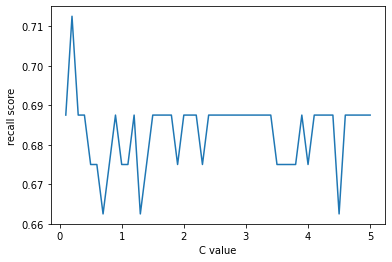

In [29]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values , recall_scores = [] ,[]

C_val = C_start
best_recall_score = 0
while (C_val < C_end) :
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, class_weight = "balanced" ,random_state = 42)
    lr_model_loop.fit(X_train , y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test , lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C = {1:.3f}".format(best_recall_score ,best_score_C_val ))

%matplotlib inline
plt.plot(C_values , recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight = "balanced",C = best_score_C_val , random_state =42)
lr_model.fit(X_train , y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

#training metrics
print("Accuracy :{0:.4f}".format(metrics.accuracy_score(y_test , lr_predict_test)))
print(metrics.confusion_matrix(y_test , lr_predict_test , labels = [1,0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test , lr_predict_test , labels = [1,0]))

Accuracy :0.7056
[[ 57  23]
 [ 45 106]]

Classification Report
              precision    recall  f1-score   support

           1       0.56      0.71      0.63        80
           0       0.82      0.70      0.76       151

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.73      0.71      0.71       231



/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs = -1 , random_state = 42 , Cs = 3 , cv = 10 , refit =  True , class_weight = "balanced")
lr_cv_model.fit(X_train , y_train.ravel())

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [32]:
lr_cv_predict_test = lr_cv_model.predict(X_test)
#training metrics
print("Accuracy :{0:.4f}".format(metrics.accuracy_score(y_test , lr_predict_test)))
print(metrics.confusion_matrix(y_test , lr_predict_test , labels = [1,0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test , lr_predict_test , labels = [1,0]))

Accuracy :0.7056
[[ 57  23]
 [ 45 106]]

Classification Report
              precision    recall  f1-score   support

           1       0.56      0.71      0.63        80
           0       0.82      0.70      0.76       151

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.73      0.71      0.71       231

